# Data Exploration


## ISIC_2020


### Import Required Libraries


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load ISIC 2020 Dataset


In [2]:
data_2020_csv = 'data/ISIC_2020/2020_train_metadata_ground_truth.csv'

image_2020_dir = 'data/ISIC_2020/train/'

In [3]:
df_2020 = pd.read_csv(data_2020_csv)
df_2020

image_name  patient_id     sex  age_approx  \
0      ISIC_2637011  IP_7279968    male        45.0   
1      ISIC_0015719  IP_3075186  female        45.0   
2      ISIC_0052212  IP_2842074  female        50.0   
3      ISIC_0068279  IP_6890425  female        45.0   
4      ISIC_0074268  IP_8723313  female        55.0   
...             ...         ...     ...         ...   
33121  ISIC_9999134  IP_6526534    male        50.0   
33122  ISIC_9999320  IP_3650745    male        65.0   
33123  ISIC_9999515  IP_2026598    male        20.0   
33124  ISIC_9999666  IP_7702038    male        50.0   
33125  ISIC_9999806  IP_0046310    male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  
0                         head/neck   unknown           benign       0  
1                   upper extremity   unknown           benign       0  
2                   lower extremity     nevus           benign       0  
3                         head/neck   unknown           benign       0  
4                   upper extremity   unknown           benign       0  
...                             ...       ...              ...     ...  
33121                         torso   unknown           benign       0  
33122                         torso   unknown           benign       0  
33123               lower extremity   unknown           benign       0  
33124               lower extremity   unknown           benign       0  
33125                         torso     nevus           benign       0  

[33126 rows x 8 columns]

### Drop Irrelevant Columns


In [4]:
df_2020 = df_2020.drop(
    columns=['patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge'])

#### Remove Invalid Target & Label Rows


In [5]:
df_2020 = df_2020[df_2020['target'].isin([0, 1])]

df_2020 = df_2020[df_2020['benign_malignant'].isin(['benign', 'malignant'])]

df_2020 = df_2020.reset_index(drop=True)

#### Standardize Diagnosis Values ('melanoma' -> 'mel')


In [6]:
df_2020.loc[df_2020['diagnosis'] == 'melanoma', 'diagnosis'] = 'mel'

### Add Image Path Column


In [7]:
df_2020['path'] = image_2020_dir + df_2020['image_name'] + '.jpg'
df_2020

image_name diagnosis benign_malignant  target  \
0      ISIC_2637011   unknown           benign       0   
1      ISIC_0015719   unknown           benign       0   
2      ISIC_0052212     nevus           benign       0   
3      ISIC_0068279   unknown           benign       0   
4      ISIC_0074268   unknown           benign       0   
...             ...       ...              ...     ...   
33121  ISIC_9999134   unknown           benign       0   
33122  ISIC_9999320   unknown           benign       0   
33123  ISIC_9999515   unknown           benign       0   
33124  ISIC_9999666   unknown           benign       0   
33125  ISIC_9999806     nevus           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_2637011.jpg  
1      data/ISIC_2020/train/ISIC_0015719.jpg  
2      data/ISIC_2020/train/ISIC_0052212.jpg  
3      data/ISIC_2020/train/ISIC_0068279.jpg  
4      data/ISIC_2020/train/ISIC_0074268.jpg  
...                                      ...  
33121  data/ISIC_2020/train/ISIC_9999134.jpg  
33122  data/ISIC_2020/train/ISIC_9999320.jpg  
33123  data/ISIC_2020/train/ISIC_9999515.jpg  
33124  data/ISIC_2020/train/ISIC_9999666.jpg  
33125  data/ISIC_2020/train/ISIC_9999806.jpg  

[33126 rows x 5 columns]

### Dataset Overview


In [8]:
df_2020

image_name diagnosis benign_malignant  target  \
0      ISIC_2637011   unknown           benign       0   
1      ISIC_0015719   unknown           benign       0   
2      ISIC_0052212     nevus           benign       0   
3      ISIC_0068279   unknown           benign       0   
4      ISIC_0074268   unknown           benign       0   
...             ...       ...              ...     ...   
33121  ISIC_9999134   unknown           benign       0   
33122  ISIC_9999320   unknown           benign       0   
33123  ISIC_9999515   unknown           benign       0   
33124  ISIC_9999666   unknown           benign       0   
33125  ISIC_9999806     nevus           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_2637011.jpg  
1      data/ISIC_2020/train/ISIC_0015719.jpg  
2      data/ISIC_2020/train/ISIC_0052212.jpg  
3      data/ISIC_2020/train/ISIC_0068279.jpg  
4      data/ISIC_2020/train/ISIC_0074268.jpg  
...                                      ...  
33121  data/ISIC_2020/train/ISIC_9999134.jpg  
33122  data/ISIC_2020/train/ISIC_9999320.jpg  
33123  data/ISIC_2020/train/ISIC_9999515.jpg  
33124  data/ISIC_2020/train/ISIC_9999666.jpg  
33125  data/ISIC_2020/train/ISIC_9999806.jpg  

[33126 rows x 5 columns]

In [9]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_name        33126 non-null  object
 1   diagnosis         33126 non-null  object
 2   benign_malignant  33126 non-null  object
 3   target            33126 non-null  int64 
 4   path              33126 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


### Class Distribution


#### Counts


In [10]:
df_2020['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

#### Percentages


In [11]:
df_2020['target'].value_counts(normalize=True)

target
0    0.98237
1    0.01763
Name: proportion, dtype: float64

### Separate Benign and Malignant Subsets


#### Benign Subset


In [12]:
df_2020_benign = df_2020[df_2020['benign_malignant'] == 'benign']
df_2020_benign

image_name diagnosis benign_malignant  target  \
0      ISIC_2637011   unknown           benign       0   
1      ISIC_0015719   unknown           benign       0   
2      ISIC_0052212     nevus           benign       0   
3      ISIC_0068279   unknown           benign       0   
4      ISIC_0074268   unknown           benign       0   
...             ...       ...              ...     ...   
33121  ISIC_9999134   unknown           benign       0   
33122  ISIC_9999320   unknown           benign       0   
33123  ISIC_9999515   unknown           benign       0   
33124  ISIC_9999666   unknown           benign       0   
33125  ISIC_9999806     nevus           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_2637011.jpg  
1      data/ISIC_2020/train/ISIC_0015719.jpg  
2      data/ISIC_2020/train/ISIC_0052212.jpg  
3      data/ISIC_2020/train/ISIC_0068279.jpg  
4      data/ISIC_2020/train/ISIC_0074268.jpg  
...                                      ...  
33121  data/ISIC_2020/train/ISIC_9999134.jpg  
33122  data/ISIC_2020/train/ISIC_9999320.jpg  
33123  data/ISIC_2020/train/ISIC_9999515.jpg  
33124  data/ISIC_2020/train/ISIC_9999666.jpg  
33125  data/ISIC_2020/train/ISIC_9999806.jpg  

[32542 rows x 5 columns]

#### Malignant Subset


In [13]:
df_2020_malignant = df_2020[df_2020['benign_malignant'] == 'malignant']
df_2020_malignant

image_name diagnosis benign_malignant  target  \
91     ISIC_0149568       mel        malignant       1   
235    ISIC_0188432       mel        malignant       1   
314    ISIC_0207268       mel        malignant       1   
399    ISIC_0232101       mel        malignant       1   
459    ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
32969  ISIC_9955163       mel        malignant       1   
33000  ISIC_9963177       mel        malignant       1   
33014  ISIC_9967383       mel        malignant       1   
33050  ISIC_9978107       mel        malignant       1   
33117  ISIC_9998682       mel        malignant       1   

                                        path  
91     data/ISIC_2020/train/ISIC_0149568.jpg  
235    data/ISIC_2020/train/ISIC_0188432.jpg  
314    data/ISIC_2020/train/ISIC_0207268.jpg  
399    data/ISIC_2020/train/ISIC_0232101.jpg  
459    data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
32969  data/ISIC_2020/train/ISIC_9955163.jpg  
33000  data/ISIC_2020/train/ISIC_9963177.jpg  
33014  data/ISIC_2020/train/ISIC_9967383.jpg  
33050  data/ISIC_2020/train/ISIC_9978107.jpg  
33117  data/ISIC_2020/train/ISIC_9998682.jpg  

[584 rows x 5 columns]

### Visualize Benign vs Malignant Distribution


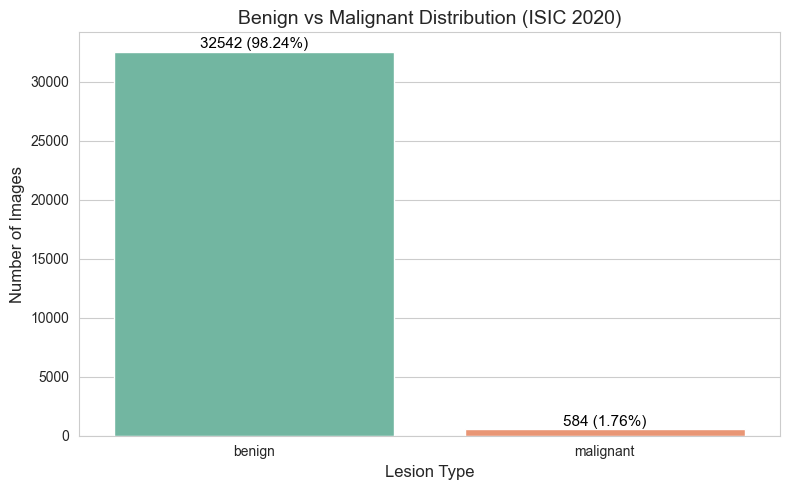

In [14]:
counts = df_2020['benign_malignant'].value_counts()
percentages = df_2020['benign_malignant'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.countplot(data=df_2020, x='benign_malignant',
                   hue='benign_malignant', palette='Set2', legend=False)

for i, p in enumerate(ax.patches):
    count = int(p.get_height())
    pct = percentages.iloc[i]
    ax.annotate(f'{count} ({pct:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() + 600),
                ha='center', va='center', fontsize=11, color='black')

plt.title("Benign vs Malignant Distribution (ISIC 2020)", fontsize=14)
plt.xlabel("Lesion Type", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.tight_layout()
plt.show()

#### Visual Inspection of Sample Benign Images


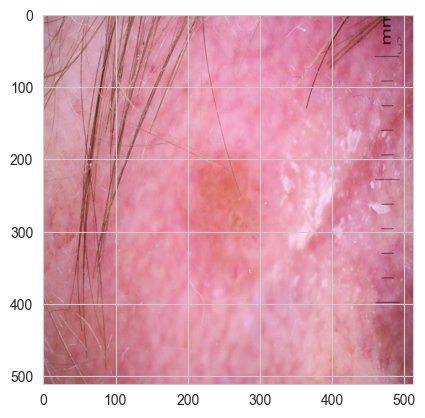

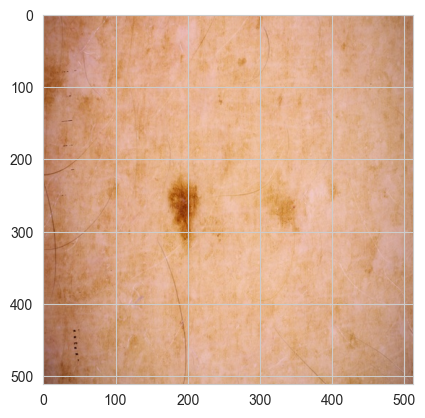

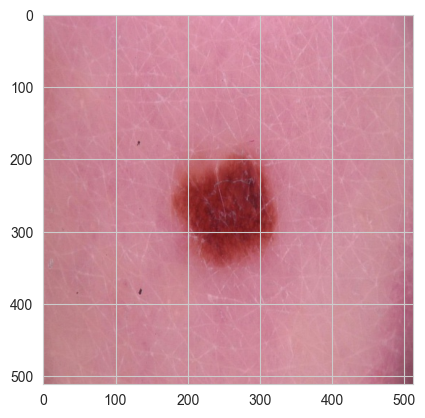

In [15]:
for im in df_2020_benign['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

#### Visual Inspection of Sample Malignant Images


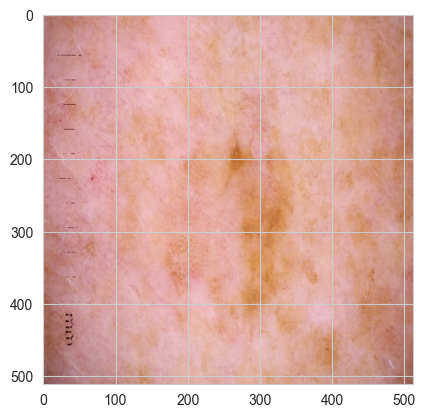

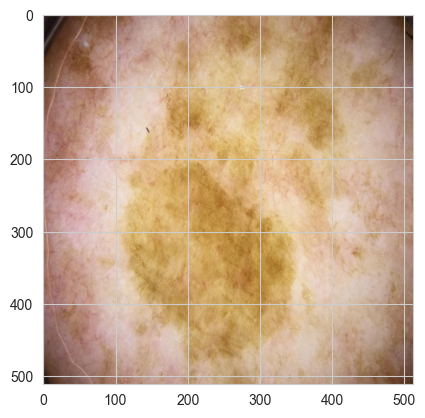

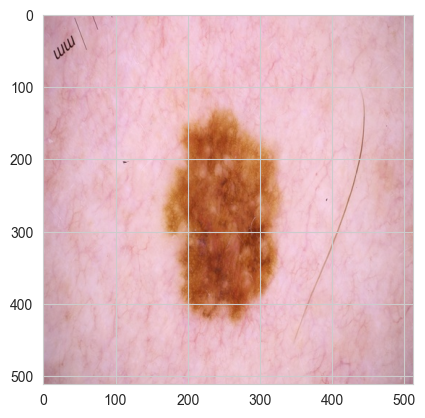

In [16]:
for im in df_2020_malignant['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## ISIC_2019


### Import Required Libraries


In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load ISIC 2019 Dataset


In [18]:
train_metadata_path = 'data/ISIC_2019/2019_train_metadata.csv'
train_ground_truth_path = 'data/ISIC_2019/2019_train_ground_truth.csv'

image_dir_train = 'data/ISIC_2019/train/'

In [19]:
df_train_meta = pd.read_csv(train_metadata_path)
df_train_gt = pd.read_csv(train_ground_truth_path)

In [20]:
df_2019 = pd.merge(df_train_meta, df_train_gt, on='image')
df_2019

image  age_approx anatom_site_general    lesion_id     sex  MEL  \
0      ISIC_0000000        55.0      anterior torso          NaN  female  0.0   
1      ISIC_0000001        30.0      anterior torso          NaN  female  0.0   
2      ISIC_0000002        60.0     upper extremity          NaN  female  1.0   
3      ISIC_0000003        30.0     upper extremity          NaN    male  0.0   
4      ISIC_0000004        80.0     posterior torso          NaN    male  1.0   
...             ...         ...                 ...          ...     ...  ...   
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female  0.0   
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male  0.0   
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male  1.0   
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female  0.0   
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male  0.0   

        NV  BCC   AK  BKL   DF  VASC  SCC  UNK  
0      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
...    ...  ...  ...  ...  ...   ...  ...  ...  
25326  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0  
25327  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  
25328  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
25329  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
25330  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  

[25331 rows x 14 columns]

### Drop Irrelevant Columns


In [21]:
df_2019 = df_2019.drop(
    columns=['sex', 'anatom_site_general', 'age_approx'])

#### Drop rows where UNK == 1 and drop UNK


In [22]:
if 'UNK' in df_2019.columns:
    df_2019 = df_2019[df_2019['UNK'] != 1].reset_index(drop=True)
    df_2019 = df_2019.drop(columns=['UNK'])

#### Remove Rows with No Positive Diagnosis Label


In [23]:
diagnosis_cols = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
df_2019 = df_2019[df_2019[diagnosis_cols].sum(
    axis=1) > 0].reset_index(drop=True)

#### Create 'diagnosis' column


In [24]:
df_2019['diagnosis'] = df_2019[diagnosis_cols].idxmax(axis=1)

#### Normalize labels to lowercase and fix 'AK' -> 'akiec'


In [25]:
df_2019['diagnosis'] = df_2019['diagnosis'].str.lower().replace({
    'ak': 'akiec'})

#### Reorder columns: image + diagnosis


In [26]:
df_2019 = df_2019[['image', 'diagnosis']]

In [27]:
df_2019

image diagnosis
0      ISIC_0000000        nv
1      ISIC_0000001        nv
2      ISIC_0000002       mel
3      ISIC_0000003        nv
4      ISIC_0000004       mel
...             ...       ...
25326  ISIC_0073247       bcc
25327  ISIC_0073248       bkl
25328  ISIC_0073249       mel
25329  ISIC_0073251        nv
25330  ISIC_0073254       bkl

[25331 rows x 2 columns]

#### Create Target Column Based on Malignant Classes


In [28]:
malignant_classes = {'mel', 'bcc', 'akiec', 'scc'}

df_2019['target'] = df_2019['diagnosis'].apply(
    lambda x: 1 if x in malignant_classes else 0)

#### Add Benign/Malignant Label


In [29]:
df_2019['benign_malignant'] = df_2019['target'].map(
    {0: 'benign', 1: 'malignant'})

#### Finalize Columns to Keep


In [30]:
df_2019['image_name'] = df_2019['image']

In [31]:
df_2019 = df_2019[['image_name', 'diagnosis',
                   'benign_malignant', 'target']].copy()

### Add Image Path Column


In [32]:
df_2019["path"] = image_dir_train + df_2019["image_name"] + ".jpg"

### Dataset Overview


In [33]:
df_2019

image_name diagnosis benign_malignant  target  \
0      ISIC_0000000        nv           benign       0   
1      ISIC_0000001        nv           benign       0   
2      ISIC_0000002       mel        malignant       1   
3      ISIC_0000003        nv           benign       0   
4      ISIC_0000004       mel        malignant       1   
...             ...       ...              ...     ...   
25326  ISIC_0073247       bcc        malignant       1   
25327  ISIC_0073248       bkl           benign       0   
25328  ISIC_0073249       mel        malignant       1   
25329  ISIC_0073251        nv           benign       0   
25330  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2019/train/ISIC_0000000.jpg  
1      data/ISIC_2019/train/ISIC_0000001.jpg  
2      data/ISIC_2019/train/ISIC_0000002.jpg  
3      data/ISIC_2019/train/ISIC_0000003.jpg  
4      data/ISIC_2019/train/ISIC_0000004.jpg  
...                                      ...  
25326  data/ISIC_2019/train/ISIC_0073247.jpg  
25327  data/ISIC_2019/train/ISIC_0073248.jpg  
25328  data/ISIC_2019/train/ISIC_0073249.jpg  
25329  data/ISIC_2019/train/ISIC_0073251.jpg  
25330  data/ISIC_2019/train/ISIC_0073254.jpg  

[25331 rows x 5 columns]

In [34]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_name        25331 non-null  object
 1   diagnosis         25331 non-null  object
 2   benign_malignant  25331 non-null  object
 3   target            25331 non-null  int64 
 4   path              25331 non-null  object
dtypes: int64(1), object(4)
memory usage: 989.6+ KB


### Class Distribution


#### Counts


In [35]:
df_2019['target'].value_counts()

target
0    15991
1     9340
Name: count, dtype: int64

#### Percentages


In [36]:
df_2019['target'].value_counts(normalize=True)

target
0    0.631282
1    0.368718
Name: proportion, dtype: float64

### Separate Benign and Malignant Subsets


#### Benign Subset


In [37]:
df_2019_benign = df_2019[df_2019['benign_malignant'] == 'benign']
df_2019_benign

image_name diagnosis benign_malignant  target  \
0      ISIC_0000000        nv           benign       0   
1      ISIC_0000001        nv           benign       0   
3      ISIC_0000003        nv           benign       0   
5      ISIC_0000006        nv           benign       0   
6      ISIC_0000007        nv           benign       0   
...             ...       ...              ...     ...   
25323  ISIC_0073244        nv           benign       0   
25324  ISIC_0073245        nv           benign       0   
25327  ISIC_0073248       bkl           benign       0   
25329  ISIC_0073251        nv           benign       0   
25330  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2019/train/ISIC_0000000.jpg  
1      data/ISIC_2019/train/ISIC_0000001.jpg  
3      data/ISIC_2019/train/ISIC_0000003.jpg  
5      data/ISIC_2019/train/ISIC_0000006.jpg  
6      data/ISIC_2019/train/ISIC_0000007.jpg  
...                                      ...  
25323  data/ISIC_2019/train/ISIC_0073244.jpg  
25324  data/ISIC_2019/train/ISIC_0073245.jpg  
25327  data/ISIC_2019/train/ISIC_0073248.jpg  
25329  data/ISIC_2019/train/ISIC_0073251.jpg  
25330  data/ISIC_2019/train/ISIC_0073254.jpg  

[15991 rows x 5 columns]

#### Malignant Subset


In [38]:
df_2019_malignant = df_2019[df_2019['benign_malignant'] == 'malignant']
df_2019_malignant

image_name diagnosis benign_malignant  target  \
2                  ISIC_0000002       mel        malignant       1   
4                  ISIC_0000004       mel        malignant       1   
12                 ISIC_0000013       mel        malignant       1   
21     ISIC_0000022_downsampled       mel        malignant       1   
25     ISIC_0000026_downsampled       mel        malignant       1   
...                         ...       ...              ...     ...   
25320              ISIC_0073238       mel        malignant       1   
25322              ISIC_0073241       mel        malignant       1   
25325              ISIC_0073246       bcc        malignant       1   
25326              ISIC_0073247       bcc        malignant       1   
25328              ISIC_0073249       mel        malignant       1   

                                                    path  
2                  data/ISIC_2019/train/ISIC_0000002.jpg  
4                  data/ISIC_2019/train/ISIC_0000004.jpg  
12                 data/ISIC_2019/train/ISIC_0000013.jpg  
21     data/ISIC_2019/train/ISIC_0000022_downsampled.jpg  
25     data/ISIC_2019/train/ISIC_0000026_downsampled.jpg  
...                                                  ...  
25320              data/ISIC_2019/train/ISIC_0073238.jpg  
25322              data/ISIC_2019/train/ISIC_0073241.jpg  
25325              data/ISIC_2019/train/ISIC_0073246.jpg  
25326              data/ISIC_2019/train/ISIC_0073247.jpg  
25328              data/ISIC_2019/train/ISIC_0073249.jpg  

[9340 rows x 5 columns]

### Visualize Benign vs Malignant Distribution


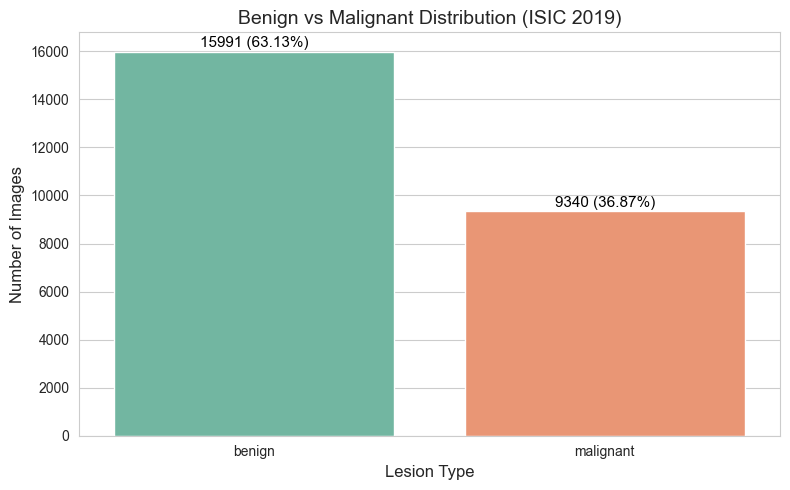

In [39]:
counts = df_2019['benign_malignant'].value_counts()
percentages = df_2019['benign_malignant'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.countplot(data=df_2019, x='benign_malignant',
                   hue='benign_malignant', palette='Set2', legend=False)

for i, p in enumerate(ax.patches):
    count = int(p.get_height())
    pct = percentages.iloc[i]
    ax.annotate(f'{count} ({pct:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() + 350),
                ha='center', va='center', fontsize=11, color='black')

plt.title("Benign vs Malignant Distribution (ISIC 2019)", fontsize=14)
plt.xlabel("Lesion Type", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.tight_layout()
plt.show()

#### Visual Inspection of Sample Benign Images


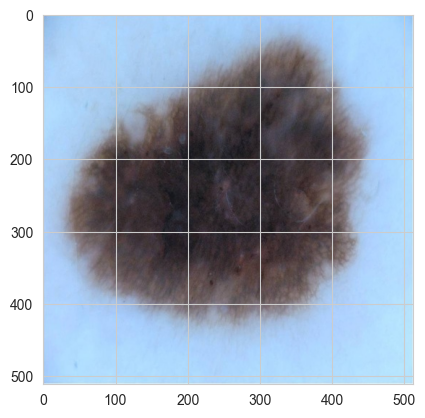

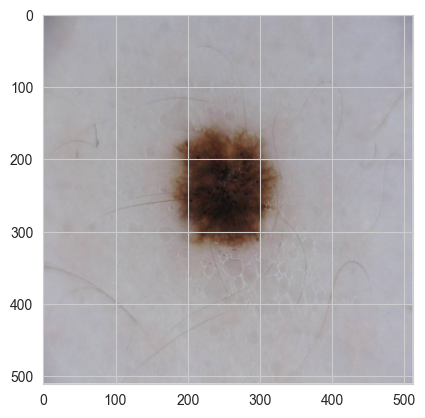

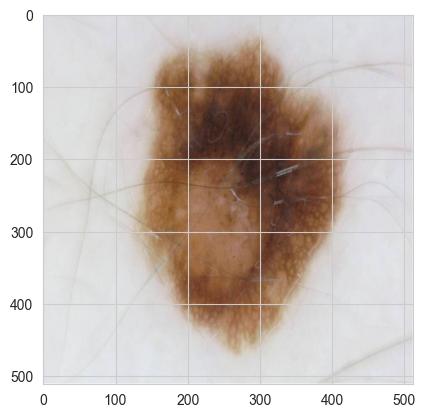

In [40]:
for im in df_2019_benign['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

#### Visual Inspection of Sample Malignant Images


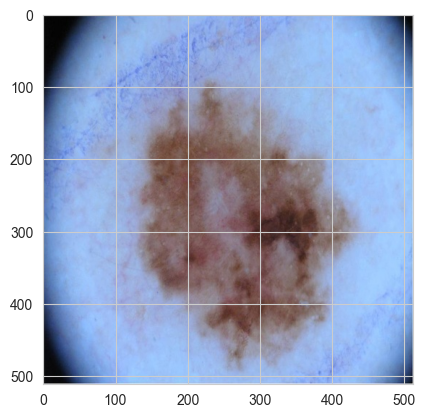

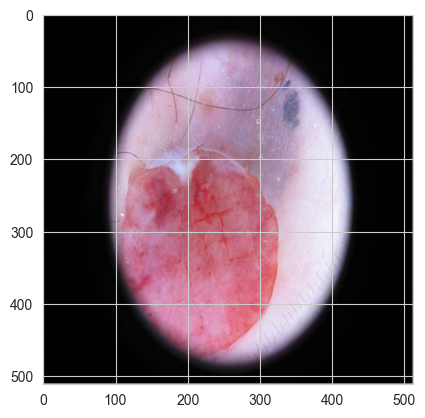

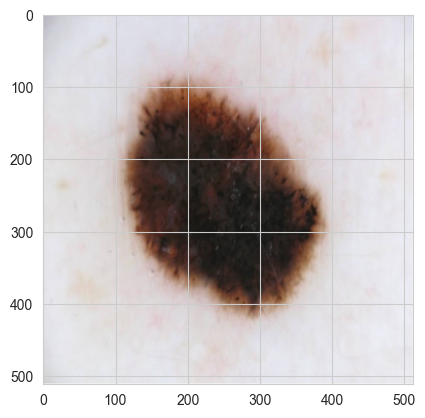

In [41]:
for im in df_2019_malignant['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## ISIC_2018


### Import Required Libraries


In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load ISIC 2018 Dataset


In [43]:
train_metadata_path = 'data/ISIC_2018/2018_train_metadata_ground_truth.csv'

image_dir_train = 'data/ISIC_2018/train/'

In [44]:
df_2018 = pd.read_csv(train_metadata_path)
df_2018

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

### Drop Irrelevant Columns


In [45]:
df_2018 = df_2018.drop(
    columns=['lesion_id', 'dx_type', 'age', 'sex', 'localization'])

#### Create 'diagnosis' column


In [46]:
malignant_classes = {'mel', 'bcc', 'akiec', 'scc'}

In [47]:
df_2018 = df_2018.rename(columns={'image_id': 'image_name', 'dx': 'diagnosis'})

In [48]:
df_2018['diagnosis'] = df_2018['diagnosis'].str.lower()

#### Create Target Column Based on Malignant Classes


In [49]:
df_2018['target'] = df_2018['diagnosis'].apply(
    lambda x: 1 if x in malignant_classes else 0)

df_2018['benign_malignant'] = df_2018['target'].map(
    {0: 'benign', 1: 'malignant'})

In [50]:
df_2018

image_name diagnosis  target benign_malignant
0      ISIC_0027419       bkl       0           benign
1      ISIC_0025030       bkl       0           benign
2      ISIC_0026769       bkl       0           benign
3      ISIC_0025661       bkl       0           benign
4      ISIC_0031633       bkl       0           benign
...             ...       ...     ...              ...
10010  ISIC_0033084     akiec       1        malignant
10011  ISIC_0033550     akiec       1        malignant
10012  ISIC_0033536     akiec       1        malignant
10013  ISIC_0032854     akiec       1        malignant
10014  ISIC_0032258       mel       1        malignant

[10015 rows x 4 columns]

### Add Image Path Column


In [51]:
df_2018["path"] = image_dir_train + df_2018["image_name"] + ".jpg"

### Dataset Overview


In [52]:
df_2018

image_name diagnosis  target benign_malignant  \
0      ISIC_0027419       bkl       0           benign   
1      ISIC_0025030       bkl       0           benign   
2      ISIC_0026769       bkl       0           benign   
3      ISIC_0025661       bkl       0           benign   
4      ISIC_0031633       bkl       0           benign   
...             ...       ...     ...              ...   
10010  ISIC_0033084     akiec       1        malignant   
10011  ISIC_0033550     akiec       1        malignant   
10012  ISIC_0033536     akiec       1        malignant   
10013  ISIC_0032854     akiec       1        malignant   
10014  ISIC_0032258       mel       1        malignant   

                                        path  
0      data/ISIC_2018/train/ISIC_0027419.jpg  
1      data/ISIC_2018/train/ISIC_0025030.jpg  
2      data/ISIC_2018/train/ISIC_0026769.jpg  
3      data/ISIC_2018/train/ISIC_0025661.jpg  
4      data/ISIC_2018/train/ISIC_0031633.jpg  
...                                      ...  
10010  data/ISIC_2018/train/ISIC_0033084.jpg  
10011  data/ISIC_2018/train/ISIC_0033550.jpg  
10012  data/ISIC_2018/train/ISIC_0033536.jpg  
10013  data/ISIC_2018/train/ISIC_0032854.jpg  
10014  data/ISIC_2018/train/ISIC_0032258.jpg  

[10015 rows x 5 columns]

In [53]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_name        10015 non-null  object
 1   diagnosis         10015 non-null  object
 2   target            10015 non-null  int64 
 3   benign_malignant  10015 non-null  object
 4   path              10015 non-null  object
dtypes: int64(1), object(4)
memory usage: 391.3+ KB


### Class Distribution


#### Counts


In [54]:
df_2018['target'].value_counts()

target
0    8061
1    1954
Name: count, dtype: int64

#### Percentages


In [55]:
df_2018['target'].value_counts(normalize=True)

target
0    0.804893
1    0.195107
Name: proportion, dtype: float64

### Separate Benign and Malignant Subsets


#### Benign Subset


In [56]:
df_2018_benign = df_2018[df_2018['benign_malignant'] == 'benign']
df_2018_benign

image_name diagnosis  target benign_malignant  \
0     ISIC_0027419       bkl       0           benign   
1     ISIC_0025030       bkl       0           benign   
2     ISIC_0026769       bkl       0           benign   
3     ISIC_0025661       bkl       0           benign   
4     ISIC_0031633       bkl       0           benign   
...            ...       ...     ...              ...   
9682  ISIC_0027924        nv       0           benign   
9683  ISIC_0031547        nv       0           benign   
9684  ISIC_0032221        nv       0           benign   
9685  ISIC_0030693        nv       0           benign   
9686  ISIC_0031649        nv       0           benign   

                                       path  
0     data/ISIC_2018/train/ISIC_0027419.jpg  
1     data/ISIC_2018/train/ISIC_0025030.jpg  
2     data/ISIC_2018/train/ISIC_0026769.jpg  
3     data/ISIC_2018/train/ISIC_0025661.jpg  
4     data/ISIC_2018/train/ISIC_0031633.jpg  
...                                     ...  
9682  data/ISIC_2018/train/ISIC_0027924.jpg  
9683  data/ISIC_2018/train/ISIC_0031547.jpg  
9684  data/ISIC_2018/train/ISIC_0032221.jpg  
9685  data/ISIC_2018/train/ISIC_0030693.jpg  
9686  data/ISIC_2018/train/ISIC_0031649.jpg  

[8061 rows x 5 columns]

#### Malignant Subset


In [57]:
df_2018_malignant = df_2018[df_2018['benign_malignant'] == 'malignant']
df_2018_malignant

image_name diagnosis  target benign_malignant  \
1211   ISIC_0025964       mel       1        malignant   
1212   ISIC_0030623       mel       1        malignant   
1213   ISIC_0027190       mel       1        malignant   
1214   ISIC_0031023       mel       1        malignant   
1215   ISIC_0028086       mel       1        malignant   
...             ...       ...     ...              ...   
10010  ISIC_0033084     akiec       1        malignant   
10011  ISIC_0033550     akiec       1        malignant   
10012  ISIC_0033536     akiec       1        malignant   
10013  ISIC_0032854     akiec       1        malignant   
10014  ISIC_0032258       mel       1        malignant   

                                        path  
1211   data/ISIC_2018/train/ISIC_0025964.jpg  
1212   data/ISIC_2018/train/ISIC_0030623.jpg  
1213   data/ISIC_2018/train/ISIC_0027190.jpg  
1214   data/ISIC_2018/train/ISIC_0031023.jpg  
1215   data/ISIC_2018/train/ISIC_0028086.jpg  
...                                      ...  
10010  data/ISIC_2018/train/ISIC_0033084.jpg  
10011  data/ISIC_2018/train/ISIC_0033550.jpg  
10012  data/ISIC_2018/train/ISIC_0033536.jpg  
10013  data/ISIC_2018/train/ISIC_0032854.jpg  
10014  data/ISIC_2018/train/ISIC_0032258.jpg  

[1954 rows x 5 columns]

### Visualize Benign vs Malignant Distribution


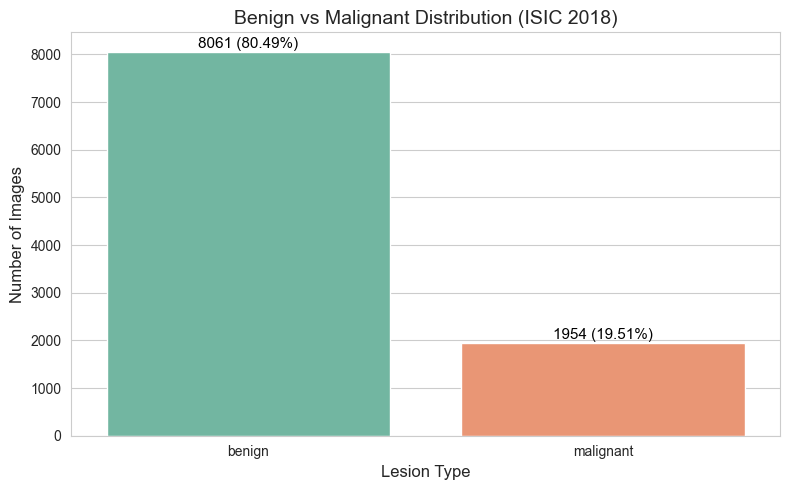

In [58]:
counts = df_2018['benign_malignant'].value_counts()
percentages = df_2018['benign_malignant'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.countplot(data=df_2018, x='benign_malignant',
                   hue='benign_malignant', palette='Set2', legend=False)

for i, p in enumerate(ax.patches):
    count = int(p.get_height())
    pct = percentages.iloc[i]
    ax.annotate(f'{count} ({pct:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() + 150),
                ha='center', va='center', fontsize=11, color='black')

plt.title("Benign vs Malignant Distribution (ISIC 2018)", fontsize=14)
plt.xlabel("Lesion Type", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.tight_layout()
plt.show()

#### Visual Inspection of Sample Benign Images


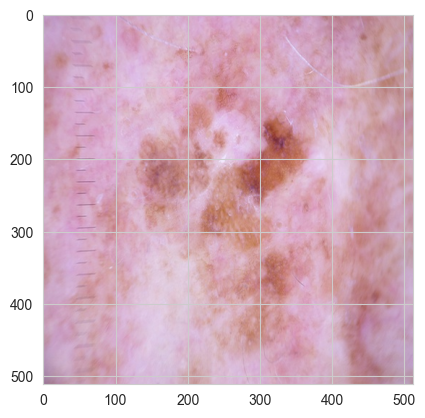

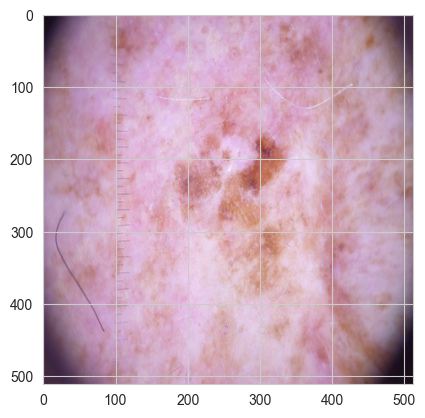

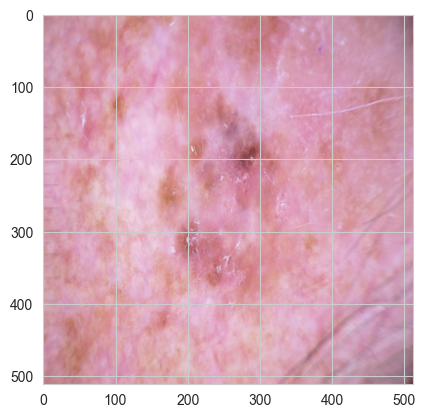

In [59]:
for im in df_2018_benign['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

#### Visual Inspection of Sample Malignant Images


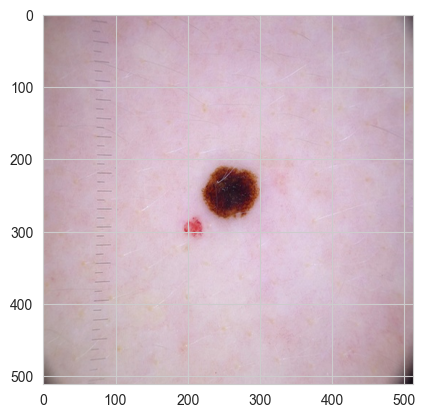

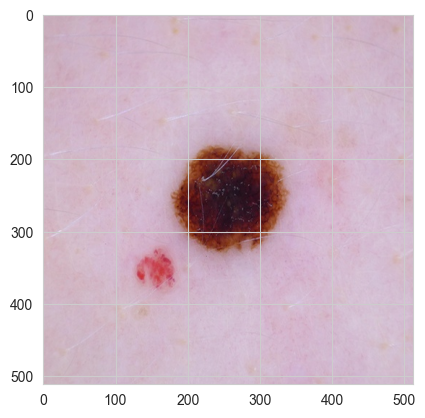

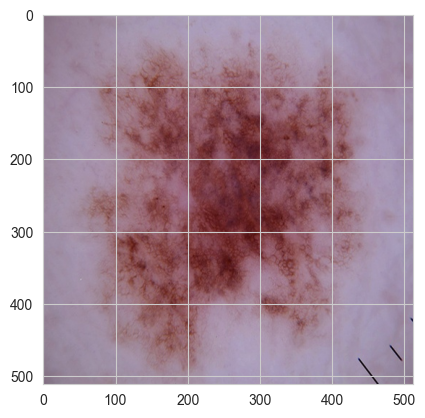

In [60]:
for im in df_2018_malignant['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## Final Dataset and Save


### Import Required Libraries


In [61]:
import os
import matplotlib.pyplot as plt

import seaborn as sns

### Column order


In [62]:
cols = ['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']
df_2020 = df_2020_malignant[cols]
df_2019 = df_2019[cols]
df_2018 = df_2018[cols]

In [63]:
df_2020

image_name diagnosis benign_malignant  target  \
91     ISIC_0149568       mel        malignant       1   
235    ISIC_0188432       mel        malignant       1   
314    ISIC_0207268       mel        malignant       1   
399    ISIC_0232101       mel        malignant       1   
459    ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
32969  ISIC_9955163       mel        malignant       1   
33000  ISIC_9963177       mel        malignant       1   
33014  ISIC_9967383       mel        malignant       1   
33050  ISIC_9978107       mel        malignant       1   
33117  ISIC_9998682       mel        malignant       1   

                                        path  
91     data/ISIC_2020/train/ISIC_0149568.jpg  
235    data/ISIC_2020/train/ISIC_0188432.jpg  
314    data/ISIC_2020/train/ISIC_0207268.jpg  
399    data/ISIC_2020/train/ISIC_0232101.jpg  
459    data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
32969  data/ISIC_2020/train/ISIC_9955163.jpg  
33000  data/ISIC_2020/train/ISIC_9963177.jpg  
33014  data/ISIC_2020/train/ISIC_9967383.jpg  
33050  data/ISIC_2020/train/ISIC_9978107.jpg  
33117  data/ISIC_2020/train/ISIC_9998682.jpg  

[584 rows x 5 columns]

In [64]:
df_2019

image_name diagnosis benign_malignant  target  \
0      ISIC_0000000        nv           benign       0   
1      ISIC_0000001        nv           benign       0   
2      ISIC_0000002       mel        malignant       1   
3      ISIC_0000003        nv           benign       0   
4      ISIC_0000004       mel        malignant       1   
...             ...       ...              ...     ...   
25326  ISIC_0073247       bcc        malignant       1   
25327  ISIC_0073248       bkl           benign       0   
25328  ISIC_0073249       mel        malignant       1   
25329  ISIC_0073251        nv           benign       0   
25330  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2019/train/ISIC_0000000.jpg  
1      data/ISIC_2019/train/ISIC_0000001.jpg  
2      data/ISIC_2019/train/ISIC_0000002.jpg  
3      data/ISIC_2019/train/ISIC_0000003.jpg  
4      data/ISIC_2019/train/ISIC_0000004.jpg  
...                                      ...  
25326  data/ISIC_2019/train/ISIC_0073247.jpg  
25327  data/ISIC_2019/train/ISIC_0073248.jpg  
25328  data/ISIC_2019/train/ISIC_0073249.jpg  
25329  data/ISIC_2019/train/ISIC_0073251.jpg  
25330  data/ISIC_2019/train/ISIC_0073254.jpg  

[25331 rows x 5 columns]

In [65]:
df_2018

image_name diagnosis benign_malignant  target  \
0      ISIC_0027419       bkl           benign       0   
1      ISIC_0025030       bkl           benign       0   
2      ISIC_0026769       bkl           benign       0   
3      ISIC_0025661       bkl           benign       0   
4      ISIC_0031633       bkl           benign       0   
...             ...       ...              ...     ...   
10010  ISIC_0033084     akiec        malignant       1   
10011  ISIC_0033550     akiec        malignant       1   
10012  ISIC_0033536     akiec        malignant       1   
10013  ISIC_0032854     akiec        malignant       1   
10014  ISIC_0032258       mel        malignant       1   

                                        path  
0      data/ISIC_2018/train/ISIC_0027419.jpg  
1      data/ISIC_2018/train/ISIC_0025030.jpg  
2      data/ISIC_2018/train/ISIC_0026769.jpg  
3      data/ISIC_2018/train/ISIC_0025661.jpg  
4      data/ISIC_2018/train/ISIC_0031633.jpg  
...                                      ...  
10010  data/ISIC_2018/train/ISIC_0033084.jpg  
10011  data/ISIC_2018/train/ISIC_0033550.jpg  
10012  data/ISIC_2018/train/ISIC_0033536.jpg  
10013  data/ISIC_2018/train/ISIC_0032854.jpg  
10014  data/ISIC_2018/train/ISIC_0032258.jpg  

[10015 rows x 5 columns]

### Concatenate


In [66]:
df_all = pd.concat([df_2020, df_2019, df_2018],
                   ignore_index=True).reset_index(drop=True)

In [67]:
df_all

image_name diagnosis benign_malignant  target  \
0      ISIC_0149568       mel        malignant       1   
1      ISIC_0188432       mel        malignant       1   
2      ISIC_0207268       mel        malignant       1   
3      ISIC_0232101       mel        malignant       1   
4      ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
35925  ISIC_0033084     akiec        malignant       1   
35926  ISIC_0033550     akiec        malignant       1   
35927  ISIC_0033536     akiec        malignant       1   
35928  ISIC_0032854     akiec        malignant       1   
35929  ISIC_0032258       mel        malignant       1   

                                        path  
0      data/ISIC_2020/train/ISIC_0149568.jpg  
1      data/ISIC_2020/train/ISIC_0188432.jpg  
2      data/ISIC_2020/train/ISIC_0207268.jpg  
3      data/ISIC_2020/train/ISIC_0232101.jpg  
4      data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
35925  data/ISIC_2018/train/ISIC_0033084.jpg  
35926  data/ISIC_2018/train/ISIC_0033550.jpg  
35927  data/ISIC_2018/train/ISIC_0033536.jpg  
35928  data/ISIC_2018/train/ISIC_0032854.jpg  
35929  data/ISIC_2018/train/ISIC_0032258.jpg  

[35930 rows x 5 columns]

### Remove Duplicates


In [68]:
df_all = df_all.drop_duplicates(
    subset='image_name', keep='first').reset_index(drop=True)

In [69]:
assert df_all['image_name'].duplicated().sum() == 0, "Duplicates still exist!"

In [70]:
df_all = df_all[df_all['diagnosis'] != 'scc'].reset_index(drop=True)
df_all

image_name diagnosis benign_malignant  target  \
0      ISIC_0149568       mel        malignant       1   
1      ISIC_0188432       mel        malignant       1   
2      ISIC_0207268       mel        malignant       1   
3      ISIC_0232101       mel        malignant       1   
4      ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
25282  ISIC_0073247       bcc        malignant       1   
25283  ISIC_0073248       bkl           benign       0   
25284  ISIC_0073249       mel        malignant       1   
25285  ISIC_0073251        nv           benign       0   
25286  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_0149568.jpg  
1      data/ISIC_2020/train/ISIC_0188432.jpg  
2      data/ISIC_2020/train/ISIC_0207268.jpg  
3      data/ISIC_2020/train/ISIC_0232101.jpg  
4      data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
25282  data/ISIC_2019/train/ISIC_0073247.jpg  
25283  data/ISIC_2019/train/ISIC_0073248.jpg  
25284  data/ISIC_2019/train/ISIC_0073249.jpg  
25285  data/ISIC_2019/train/ISIC_0073251.jpg  
25286  data/ISIC_2019/train/ISIC_0073254.jpg  

[25287 rows x 5 columns]

In [71]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25287 entries, 0 to 25286
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_name        25287 non-null  object
 1   diagnosis         25287 non-null  object
 2   benign_malignant  25287 non-null  object
 3   target            25287 non-null  int64 
 4   path              25287 non-null  object
dtypes: int64(1), object(4)
memory usage: 987.9+ KB


In [72]:
os.makedirs('data/all_classification/', exist_ok=True)

df_all[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/all_classification/all_classification.csv', index=False)

## Melanoma Classification


In [73]:
df_mel = df_all.copy()

In [74]:
df_mel['target'] = df_mel['diagnosis'].apply(lambda x: 1 if x == 'mel' else 0)

In [75]:
df_mel['benign_malignant'] = df_mel['diagnosis'].apply(
    lambda x: 'malignant' if x == 'mel' else 'benign')

In [76]:
df_mel

image_name diagnosis benign_malignant  target  \
0      ISIC_0149568       mel        malignant       1   
1      ISIC_0188432       mel        malignant       1   
2      ISIC_0207268       mel        malignant       1   
3      ISIC_0232101       mel        malignant       1   
4      ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
25282  ISIC_0073247       bcc           benign       0   
25283  ISIC_0073248       bkl           benign       0   
25284  ISIC_0073249       mel        malignant       1   
25285  ISIC_0073251        nv           benign       0   
25286  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_0149568.jpg  
1      data/ISIC_2020/train/ISIC_0188432.jpg  
2      data/ISIC_2020/train/ISIC_0207268.jpg  
3      data/ISIC_2020/train/ISIC_0232101.jpg  
4      data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
25282  data/ISIC_2019/train/ISIC_0073247.jpg  
25283  data/ISIC_2019/train/ISIC_0073248.jpg  
25284  data/ISIC_2019/train/ISIC_0073249.jpg  
25285  data/ISIC_2019/train/ISIC_0073251.jpg  
25286  data/ISIC_2019/train/ISIC_0073254.jpg  

[25287 rows x 5 columns]

In [77]:
df_mel['target'].value_counts()

target
0    20181
1     5106
Name: count, dtype: int64

In [78]:
df_mel['benign_malignant'].value_counts()

benign_malignant
benign       20181
malignant     5106
Name: count, dtype: int64

In [79]:
df_mel_1 = df_mel[df_mel['target'] == 1]

In [80]:
df_mel_0 = df_mel[df_mel['target'] == 0].sample(
    n=len(df_mel_1), random_state=55)

In [81]:
df_mel_balanced = pd.concat([df_mel_1, df_mel_0]).sample(
    frac=1, random_state=55).reset_index(drop=True)

In [82]:
df_mel_balanced['target'].value_counts()

target
1    5106
0    5106
Name: count, dtype: int64

In [83]:
df_mel_balanced['benign_malignant'].value_counts()

benign_malignant
malignant    5106
benign       5106
Name: count, dtype: int64

In [84]:
df_mel_balanced

image_name diagnosis benign_malignant  target  \
0                  ISIC_0054974       mel        malignant       1   
1      ISIC_0000457_downsampled        nv           benign       0   
2      ISIC_0000026_downsampled       mel        malignant       1   
3                  ISIC_0032535       mel        malignant       1   
4                  ISIC_0054624       mel        malignant       1   
...                         ...       ...              ...     ...   
10207              ISIC_0071772     akiec           benign       0   
10208              ISIC_0059627       bcc           benign       0   
10209              ISIC_0061706        nv           benign       0   
10210  ISIC_0014076_downsampled       mel        malignant       1   
10211              ISIC_0070814       mel        malignant       1   

                                                    path  
0                  data/ISIC_2019/train/ISIC_0054974.jpg  
1      data/ISIC_2019/train/ISIC_0000457_downsampled.jpg  
2      data/ISIC_2019/train/ISIC_0000026_downsampled.jpg  
3                  data/ISIC_2019/train/ISIC_0032535.jpg  
4                  data/ISIC_2019/train/ISIC_0054624.jpg  
...                                                  ...  
10207              data/ISIC_2019/train/ISIC_0071772.jpg  
10208              data/ISIC_2019/train/ISIC_0059627.jpg  
10209              data/ISIC_2019/train/ISIC_0061706.jpg  
10210  data/ISIC_2019/train/ISIC_0014076_downsampled.jpg  
10211              data/ISIC_2019/train/ISIC_0070814.jpg  

[10212 rows x 5 columns]

In [85]:
os.makedirs('data/mel_classification/', exist_ok=True)

df_mel_balanced[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/mel_classification/mel_classification.csv', index=False)

## Nevus Classification


In [86]:
df_nv = df_all[df_all['diagnosis'] != 'mel'].copy()

In [87]:
df_nv['target'] = df_nv['diagnosis'].apply(lambda x: 1 if x == 'nv' else 0)

In [88]:
df_nv['benign_malignant'] = df_nv['diagnosis'].apply(
    lambda x: 'benign' if x == 'nv' else 'malignant')

In [89]:
df_nv

image_name diagnosis benign_malignant  target  \
584    ISIC_0000000        nv           benign       1   
585    ISIC_0000001        nv           benign       1   
587    ISIC_0000003        nv           benign       1   
589    ISIC_0000006        nv           benign       1   
590    ISIC_0000007        nv           benign       1   
...             ...       ...              ...     ...   
25281  ISIC_0073246       bcc        malignant       0   
25282  ISIC_0073247       bcc        malignant       0   
25283  ISIC_0073248       bkl        malignant       0   
25285  ISIC_0073251        nv           benign       1   
25286  ISIC_0073254       bkl        malignant       0   

                                        path  
584    data/ISIC_2019/train/ISIC_0000000.jpg  
585    data/ISIC_2019/train/ISIC_0000001.jpg  
587    data/ISIC_2019/train/ISIC_0000003.jpg  
589    data/ISIC_2019/train/ISIC_0000006.jpg  
590    data/ISIC_2019/train/ISIC_0000007.jpg  
...                                      ...  
25281  data/ISIC_2019/train/ISIC_0073246.jpg  
25282  data/ISIC_2019/train/ISIC_0073247.jpg  
25283  data/ISIC_2019/train/ISIC_0073248.jpg  
25285  data/ISIC_2019/train/ISIC_0073251.jpg  
25286  data/ISIC_2019/train/ISIC_0073254.jpg  

[20181 rows x 5 columns]

In [90]:
df_nv['target'].value_counts()

target
1    12875
0     7306
Name: count, dtype: int64

In [91]:
df_nv['benign_malignant'].value_counts()

benign_malignant
benign       12875
malignant     7306
Name: count, dtype: int64

In [92]:
df_nv_benign = df_nv[df_nv['target'] == 1]

In [93]:
df_nv_malignant = df_nv[df_nv['target'] == 0]

In [94]:
df_nv_benign_under = df_nv_benign.sample(
    n=len(df_nv_malignant), random_state=55)

In [95]:
df_nv_balanced = pd.concat([df_nv_benign_under, df_nv_malignant]).sample(
    frac=1, random_state=55).reset_index(drop=True)

In [96]:
df_nv_balanced['target'].value_counts()

target
0    7306
1    7306
Name: count, dtype: int64

In [97]:
df_nv_balanced['benign_malignant'].value_counts()

benign_malignant
malignant    7306
benign       7306
Name: count, dtype: int64

In [98]:
df_nv_balanced

image_name diagnosis benign_malignant  target  \
0      ISIC_0064300       bcc        malignant       0   
1      ISIC_0009932        nv           benign       1   
2      ISIC_0063803       bcc        malignant       0   
3      ISIC_0031122       bcc        malignant       0   
4      ISIC_0024588        nv           benign       1   
...             ...       ...              ...     ...   
14607  ISIC_0071991       bcc        malignant       0   
14608  ISIC_0067854        nv           benign       1   
14609  ISIC_0065387       bkl        malignant       0   
14610  ISIC_0024737        nv           benign       1   
14611  ISIC_0066007       bkl        malignant       0   

                                        path  
0      data/ISIC_2019/train/ISIC_0064300.jpg  
1      data/ISIC_2019/train/ISIC_0009932.jpg  
2      data/ISIC_2019/train/ISIC_0063803.jpg  
3      data/ISIC_2019/train/ISIC_0031122.jpg  
4      data/ISIC_2019/train/ISIC_0024588.jpg  
...                                      ...  
14607  data/ISIC_2019/train/ISIC_0071991.jpg  
14608  data/ISIC_2019/train/ISIC_0067854.jpg  
14609  data/ISIC_2019/train/ISIC_0065387.jpg  
14610  data/ISIC_2019/train/ISIC_0024737.jpg  
14611  data/ISIC_2019/train/ISIC_0066007.jpg  

[14612 rows x 5 columns]

In [99]:
os.makedirs('data/nev_classification/', exist_ok=True)

df_nv_balanced[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/nev_classification/nev_classification.csv', index=False)

## Benign vs Malignant


In [100]:
df_all

image_name diagnosis benign_malignant  target  \
0      ISIC_0149568       mel        malignant       1   
1      ISIC_0188432       mel        malignant       1   
2      ISIC_0207268       mel        malignant       1   
3      ISIC_0232101       mel        malignant       1   
4      ISIC_0247330       mel        malignant       1   
...             ...       ...              ...     ...   
25282  ISIC_0073247       bcc        malignant       1   
25283  ISIC_0073248       bkl           benign       0   
25284  ISIC_0073249       mel        malignant       1   
25285  ISIC_0073251        nv           benign       0   
25286  ISIC_0073254       bkl           benign       0   

                                        path  
0      data/ISIC_2020/train/ISIC_0149568.jpg  
1      data/ISIC_2020/train/ISIC_0188432.jpg  
2      data/ISIC_2020/train/ISIC_0207268.jpg  
3      data/ISIC_2020/train/ISIC_0232101.jpg  
4      data/ISIC_2020/train/ISIC_0247330.jpg  
...                                      ...  
25282  data/ISIC_2019/train/ISIC_0073247.jpg  
25283  data/ISIC_2019/train/ISIC_0073248.jpg  
25284  data/ISIC_2019/train/ISIC_0073249.jpg  
25285  data/ISIC_2019/train/ISIC_0073251.jpg  
25286  data/ISIC_2019/train/ISIC_0073254.jpg  

[25287 rows x 5 columns]

In [101]:
df_binary = df_all[~df_all['diagnosis'].isin(['mel', 'nv'])].copy()
df_binary

image_name diagnosis benign_malignant  target  \
1592               ISIC_0010491       bkl           benign       0   
1818   ISIC_0012086_downsampled       bkl           benign       0   
1820   ISIC_0012090_downsampled       bkl           benign       0   
1827   ISIC_0012103_downsampled       bkl           benign       0   
1833   ISIC_0012117_downsampled       bkl           benign       0   
...                         ...       ...              ...     ...   
25274              ISIC_0073235       bkl           benign       0   
25281              ISIC_0073246       bcc        malignant       1   
25282              ISIC_0073247       bcc        malignant       1   
25283              ISIC_0073248       bkl           benign       0   
25286              ISIC_0073254       bkl           benign       0   

                                                    path  
1592               data/ISIC_2019/train/ISIC_0010491.jpg  
1818   data/ISIC_2019/train/ISIC_0012086_downsampled.jpg  
1820   data/ISIC_2019/train/ISIC_0012090_downsampled.jpg  
1827   data/ISIC_2019/train/ISIC_0012103_downsampled.jpg  
1833   data/ISIC_2019/train/ISIC_0012117_downsampled.jpg  
...                                                  ...  
25274              data/ISIC_2019/train/ISIC_0073235.jpg  
25281              data/ISIC_2019/train/ISIC_0073246.jpg  
25282              data/ISIC_2019/train/ISIC_0073247.jpg  
25283              data/ISIC_2019/train/ISIC_0073248.jpg  
25286              data/ISIC_2019/train/ISIC_0073254.jpg  

[7306 rows x 5 columns]

In [102]:
df_binary['target'] = df_binary['benign_malignant'].apply(
    lambda x: 1 if x == 'malignant' else 0)

In [103]:
df_binary[['target', 'diagnosis']].value_counts()

target  diagnosis
1       bcc          3323
0       bkl          2624
1       akiec         867
0       vasc          253
        df            239
Name: count, dtype: int64

In [104]:
df_binary['diagnosis'].value_counts()

diagnosis
bcc      3323
bkl      2624
akiec     867
vasc      253
df        239
Name: count, dtype: int64

In [105]:
df_binary['target'].value_counts()

target
1    4190
0    3116
Name: count, dtype: int64

In [106]:
df_binary['benign_malignant'].value_counts()

benign_malignant
malignant    4190
benign       3116
Name: count, dtype: int64

In [107]:
target_counts = {
    'bcc': 2149,
    'akiec': 561,
    'scc': 406
}

In [108]:
malignant_df = df_binary[df_binary['target'] == 1]

In [109]:
benign_df = df_binary[df_binary['target'] == 0]

In [110]:
malignant_sampled = pd.concat([
    malignant_df[malignant_df['diagnosis'] ==
                 diag].sample(n=count, random_state=55)
    for diag, count in target_counts.items()
])

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
df_balanced = pd.concat([benign_df, malignant_sampled]).sample(
    frac=1, random_state=55).reset_index(drop=True)

In [ ]:
print(df_balanced['target'].value_counts())
print(df_balanced['diagnosis'].value_counts())

target
0    3116
1    3116
Name: count, dtype: int64
diagnosis
bkl      2624
bcc      2149
akiec     561
scc       406
vasc      253
df        239
Name: count, dtype: int64


In [ ]:
os.makedirs('data/binary_classification/', exist_ok=True)
df_balanced[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/binary_classification/binary_classification.csv', index=False)

print("Binary classification CSV saved:", len(df_balanced), "samples.")

Binary classification CSV saved: 6232 samples.


## Benign Classification


In [ ]:
df_benign = df_all[(df_all['diagnosis'] != 'mel') &
                   (df_all['diagnosis'] != 'nv')].copy()
df_benign = df_benign[df_benign['target'] == 0].copy()
df_benign

image_name diagnosis benign_malignant  target  \
1592               ISIC_0010491       bkl           benign       0   
1818   ISIC_0012086_downsampled       bkl           benign       0   
1820   ISIC_0012090_downsampled       bkl           benign       0   
1827   ISIC_0012103_downsampled       bkl           benign       0   
1833   ISIC_0012117_downsampled       bkl           benign       0   
...                         ...       ...              ...     ...   
25881              ISIC_0073205       bkl           benign       0   
25898              ISIC_0073228       bkl           benign       0   
25902              ISIC_0073235       bkl           benign       0   
25911              ISIC_0073248       bkl           benign       0   
25914              ISIC_0073254       bkl           benign       0   

                                                    path  
1592               data/ISIC_2019/train/ISIC_0010491.jpg  
1818   data/ISIC_2019/train/ISIC_0012086_downsampled.jpg  
1820   data/ISIC_2019/train/ISIC_0012090_downsampled.jpg  
1827   data/ISIC_2019/train/ISIC_0012103_downsampled.jpg  
1833   data/ISIC_2019/train/ISIC_0012117_downsampled.jpg  
...                                                  ...  
25881              data/ISIC_2019/train/ISIC_0073205.jpg  
25898              data/ISIC_2019/train/ISIC_0073228.jpg  
25902              data/ISIC_2019/train/ISIC_0073235.jpg  
25911              data/ISIC_2019/train/ISIC_0073248.jpg  
25914              data/ISIC_2019/train/ISIC_0073254.jpg  

[3116 rows x 5 columns]

In [ ]:
df_benign['diagnosis'].value_counts()

diagnosis
bkl     2624
vasc     253
df       239
Name: count, dtype: int64

In [ ]:
df_benign['benign_malignant'].unique()

array(['benign'], dtype=object)

In [ ]:
df_bkl = df_benign[df_benign['diagnosis']
                   == 'bkl'].sample(n=253, random_state=55)
df_df = df_benign[df_benign['diagnosis'] == 'df']
df_vasc = df_benign[df_benign['diagnosis'] == 'vasc']

df_balanced = pd.concat([df_bkl, df_df, df_vasc], axis=0).sample(
    frac=1, random_state=55).reset_index(drop=True)

In [ ]:
os.makedirs('data/benign_classification/', exist_ok=True)
df_balanced[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/benign_classification/benign_classification.csv', index=False)

print("Benign classification CSV saved:", len(df_balanced), "samples.")

Benign classification CSV saved: 745 samples.


## Malignant Classification


In [ ]:
df_malignant = df_all[(df_all['diagnosis'] != 'mel') &
                      (df_all['diagnosis'] != 'nv')].copy()
df_malignant = df_malignant[df_malignant['target'] == 1].copy()
df_malignant

image_name diagnosis benign_malignant  target  \
3510   ISIC_0024329       scc        malignant       1   
3512   ISIC_0024331       bcc        malignant       1   
3513   ISIC_0024332       bcc        malignant       1   
3526   ISIC_0024345       bcc        malignant       1   
3541   ISIC_0024360       bcc        malignant       1   
...             ...       ...              ...     ...   
25895  ISIC_0073224     akiec        malignant       1   
25896  ISIC_0073225       bcc        malignant       1   
25899  ISIC_0073229       bcc        malignant       1   
25909  ISIC_0073246       bcc        malignant       1   
25910  ISIC_0073247       bcc        malignant       1   

                                        path  
3510   data/ISIC_2019/train/ISIC_0024329.jpg  
3512   data/ISIC_2019/train/ISIC_0024331.jpg  
3513   data/ISIC_2019/train/ISIC_0024332.jpg  
3526   data/ISIC_2019/train/ISIC_0024345.jpg  
3541   data/ISIC_2019/train/ISIC_0024360.jpg  
...                                      ...  
25895  data/ISIC_2019/train/ISIC_0073224.jpg  
25896  data/ISIC_2019/train/ISIC_0073225.jpg  
25899  data/ISIC_2019/train/ISIC_0073229.jpg  
25909  data/ISIC_2019/train/ISIC_0073246.jpg  
25910  data/ISIC_2019/train/ISIC_0073247.jpg  

[4818 rows x 5 columns]

In [ ]:
df_malignant['diagnosis'].value_counts()

diagnosis
bcc      3323
akiec     867
scc       628
Name: count, dtype: int64

In [ ]:
df_malignant['benign_malignant'].unique()

array(['malignant'], dtype=object)

In [ ]:
df_bcc = df_malignant[df_malignant['diagnosis']
                      == 'bcc'].sample(n=867, random_state=55)
df_akiec = df_malignant[df_malignant['diagnosis']
                        == 'akiec'].sample(n=867, random_state=55)

df_malignant_balanced = pd.concat([df_bcc, df_akiec], axis=0).sample(
    frac=1, random_state=55).reset_index(drop=True)

print(df_malignant_balanced['diagnosis'].value_counts())

diagnosis
bcc      867
akiec    867
Name: count, dtype: int64


In [ ]:
os.makedirs('data/malignant_classification/', exist_ok=True)
df_malignant_balanced[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/malignant_classification/malignant_classification.csv', index=False)

print("Malignant classification CSV saved:",
      len(df_malignant_balanced), "samples.")

Malignant classification CSV saved: 1734 samples.


In [ ]:
df_malignant = df_all[(df_all['diagnosis'] != 'mel') &
                      (df_all['diagnosis'] != 'nv')].copy()
df_malignant = df_malignant[df_malignant['target'] == 1].copy()
df_malignant

image_name diagnosis benign_malignant  target  \
3510   ISIC_0024329       scc        malignant       1   
3512   ISIC_0024331       bcc        malignant       1   
3513   ISIC_0024332       bcc        malignant       1   
3526   ISIC_0024345       bcc        malignant       1   
3541   ISIC_0024360       bcc        malignant       1   
...             ...       ...              ...     ...   
25895  ISIC_0073224     akiec        malignant       1   
25896  ISIC_0073225       bcc        malignant       1   
25899  ISIC_0073229       bcc        malignant       1   
25909  ISIC_0073246       bcc        malignant       1   
25910  ISIC_0073247       bcc        malignant       1   

                                        path  
3510   data/ISIC_2019/train/ISIC_0024329.jpg  
3512   data/ISIC_2019/train/ISIC_0024331.jpg  
3513   data/ISIC_2019/train/ISIC_0024332.jpg  
3526   data/ISIC_2019/train/ISIC_0024345.jpg  
3541   data/ISIC_2019/train/ISIC_0024360.jpg  
...                                      ...  
25895  data/ISIC_2019/train/ISIC_0073224.jpg  
25896  data/ISIC_2019/train/ISIC_0073225.jpg  
25899  data/ISIC_2019/train/ISIC_0073229.jpg  
25909  data/ISIC_2019/train/ISIC_0073246.jpg  
25910  data/ISIC_2019/train/ISIC_0073247.jpg  

[4818 rows x 5 columns]

In [ ]:
df_malignant['diagnosis'].value_counts()

diagnosis
bcc      3323
akiec     867
scc       628
Name: count, dtype: int64

In [ ]:
df_malignant['benign_malignant'].unique()

array(['malignant'], dtype=object)

In [ ]:
df_scc = df_malignant[df_malignant['diagnosis'] == 'scc']

df_bcc = df_malignant[df_malignant['diagnosis']
                      == 'bcc'].sample(n=314, random_state=55)
df_akiec = df_malignant[df_malignant['diagnosis']
                        == 'akiec'].sample(n=314, random_state=55)

In [ ]:
df_non_scc = pd.concat([df_bcc, df_akiec], axis=0)

In [ ]:
df_binary_scc = pd.concat([df_scc, df_non_scc], axis=0).sample(
    frac=1, random_state=55).reset_index(drop=True)

In [ ]:
df_binary_scc['label'] = df_binary_scc['diagnosis'].apply(
    lambda x: 1 if x == 'scc' else 0)

In [ ]:
df_binary_scc

image_name diagnosis benign_malignant  target  \
0     ISIC_0054163       scc        malignant       1   
1     ISIC_0056206       bcc        malignant       1   
2     ISIC_0065326       scc        malignant       1   
3     ISIC_0065169     akiec        malignant       1   
4     ISIC_0024843       scc        malignant       1   
...            ...       ...              ...     ...   
1251  ISIC_0069086       scc        malignant       1   
1252  ISIC_0061588     akiec        malignant       1   
1253  ISIC_0057770       scc        malignant       1   
1254  ISIC_0058573       bcc        malignant       1   
1255  ISIC_0065604       scc        malignant       1   

                                       path  label  
0     data/ISIC_2019/train/ISIC_0054163.jpg      1  
1     data/ISIC_2019/train/ISIC_0056206.jpg      0  
2     data/ISIC_2019/train/ISIC_0065326.jpg      1  
3     data/ISIC_2019/train/ISIC_0065169.jpg      0  
4     data/ISIC_2019/train/ISIC_0024843.jpg      1  
...                                     ...    ...  
1251  data/ISIC_2019/train/ISIC_0069086.jpg      1  
1252  data/ISIC_2019/train/ISIC_0061588.jpg      0  
1253  data/ISIC_2019/train/ISIC_0057770.jpg      1  
1254  data/ISIC_2019/train/ISIC_0058573.jpg      0  
1255  data/ISIC_2019/train/ISIC_0065604.jpg      1  

[1256 rows x 6 columns]

In [ ]:
os.makedirs('data/scc_classification/', exist_ok=True)
df_binary_scc[['image_name', 'diagnosis', 'benign_malignant', 'target', 'path']].to_csv(
    'data/scc_classification/scc_classification.csv', index=False)

print("scc classification CSV saved:",
      len(df_binary_scc), "samples.")

scc classification CSV saved: 1256 samples.
